In [4]:
import pandas as pd

# Wczytanie danych z pliku CSV
file_path = r'/experiments/hyperparameter_tuning_progress.csv'
df = pd.read_csv(file_path)

# Wyświetlenie pierwszych kilku wierszy, aby zweryfikować poprawność wczytania
print(df.head())


   hidden_size  learning_rate  num_layers  test_accuracy  \
0          128         0.0100           2      65.217391   
1          128         0.0100           3      58.695652   
2          128         0.0010           2      80.434783   
3          128         0.0010           3      78.260870   
4          128         0.0001           2      76.086957   

                                        epoch_losses  \
0  [1.5464374621709187, 1.371038019657135, 1.2272...   
1  [1.650272250175476, 1.514645516872406, 1.51432...   
2  [1.5843527913093567, 1.4416902661323547, 1.125...   
3  [1.6058993140856426, 1.447391430536906, 1.1465...   
4  [1.6067441701889038, 1.5949175159136455, 1.586...   

                                    epoch_accuracies  \
0  [33.70165745856354, 50.27624309392265, 51.3812...   
1  [20.441988950276244, 38.12154696132597, 40.331...   
2  [34.25414364640884, 56.353591160220994, 59.668...   
3  [20.994475138121548, 49.72375690607735, 57.458...   
4  [24.30939226519337,

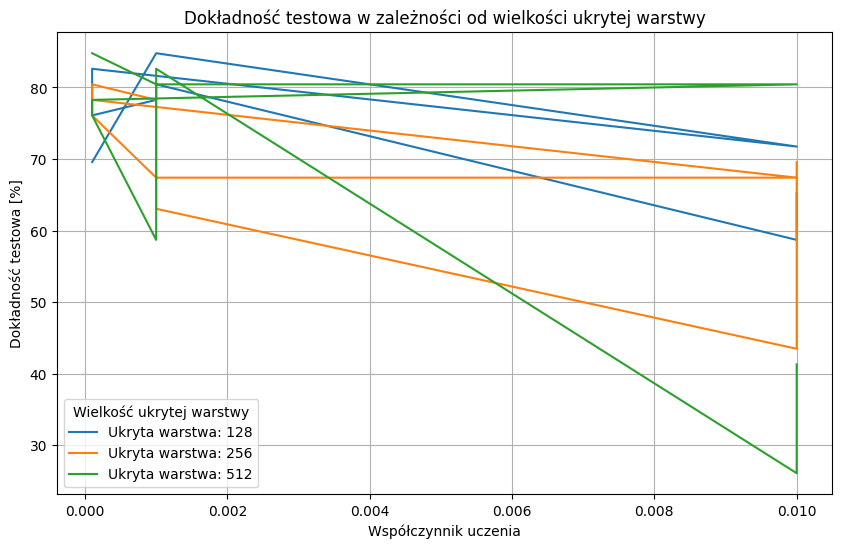

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for hidden_size in df['hidden_size'].unique():
    subset = df[df['hidden_size'] == hidden_size]
    plt.plot(subset['learning_rate'], subset['test_accuracy'], label=f'Ukryta warstwa: {hidden_size}')

plt.xlabel('Współczynnik uczenia')
plt.ylabel('Dokładność testowa [%]')
plt.title('Dokładność testowa w zależności od wielkości ukrytej warstwy')
plt.legend(title='Wielkość ukrytej warstwy')
plt.grid()
plt.show()


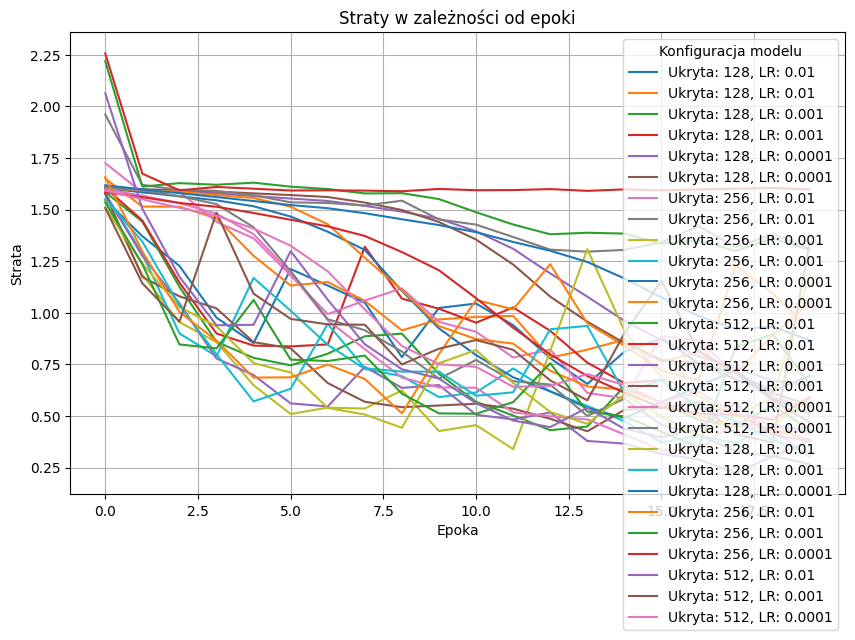

In [3]:
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    epoch_losses = eval(row['epoch_losses'])
    plt.plot(range(len(epoch_losses)), epoch_losses, label=f'Ukryta: {row["hidden_size"]}, LR: {row["learning_rate"]}')

plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Straty w zależności od epoki')
plt.legend(title='Konfiguracja modelu')
plt.grid()
plt.show()


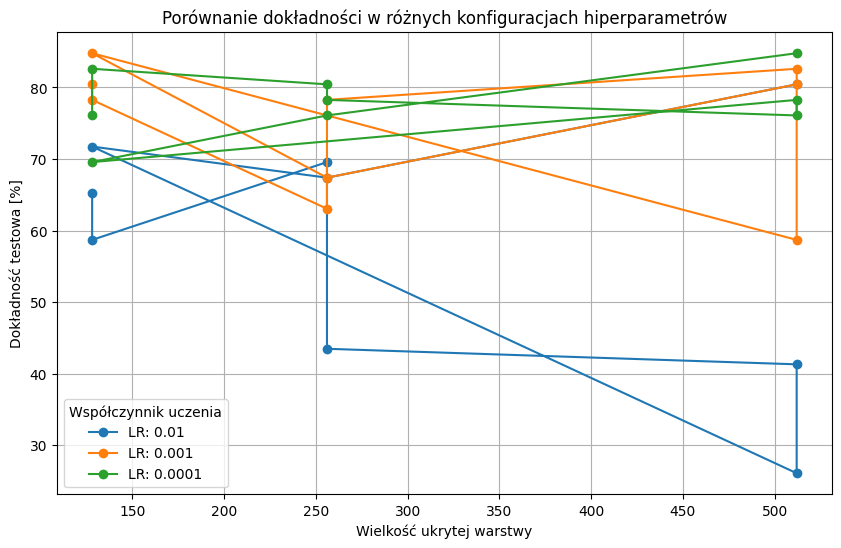

In [4]:
plt.figure(figsize=(10, 6))
for learning_rate in df['learning_rate'].unique():
    subset = df[df['learning_rate'] == learning_rate]
    plt.plot(subset['hidden_size'], subset['test_accuracy'], marker='o', label=f'LR: {learning_rate}')

plt.xlabel('Wielkość ukrytej warstwy')
plt.ylabel('Dokładność testowa [%]')
plt.title('Porównanie dokładności w różnych konfiguracjach hiperparametrów')
plt.legend(title='Współczynnik uczenia')
plt.grid()
plt.show()


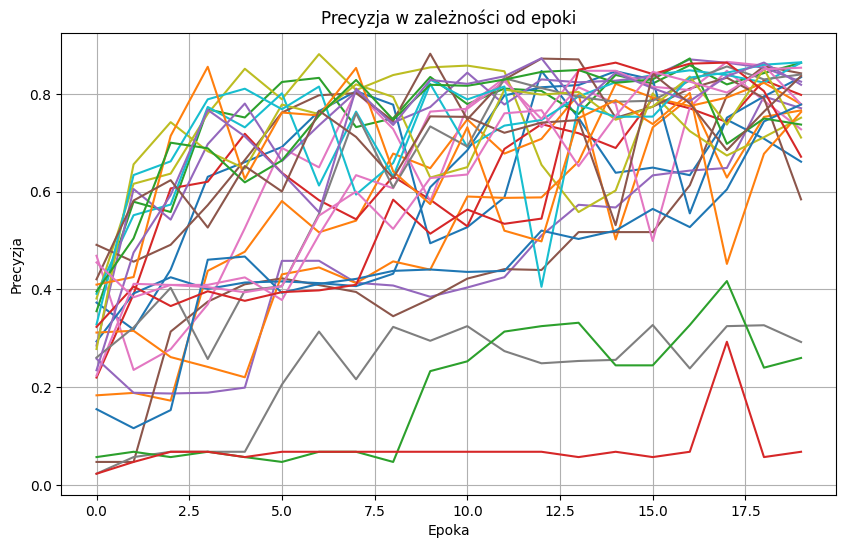

In [12]:
plt.figure(figsize=(10, 6))
for index, row in df.iterrows():
    epoch_precisions = eval(row['epoch_precisions'])
    plt.plot(range(len(epoch_precisions)), epoch_precisions, label=f'Ukryta: {row["hidden_size"]}, LR: {row["learning_rate"]}')

plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.title('Precyzja w zależności od epoki')
# plt.legend(title='Konfiguracja modelu')
plt.grid()
plt.show()


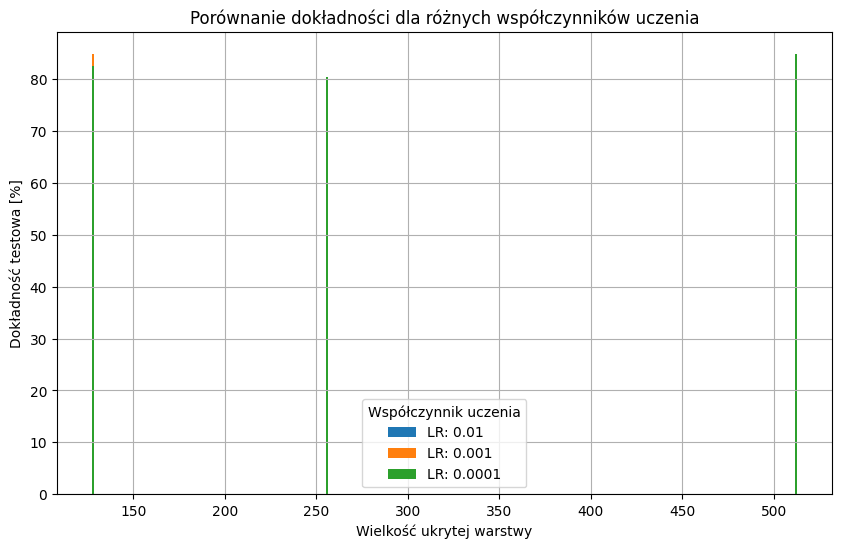

In [6]:
plt.figure(figsize=(10, 6))
for learning_rate in df['learning_rate'].unique():
    subset = df[df['learning_rate'] == learning_rate]
    plt.bar(subset['hidden_size'], subset['test_accuracy'], label=f'LR: {learning_rate}')

plt.xlabel('Wielkość ukrytej warstwy')
plt.ylabel('Dokładność testowa [%]')
plt.title('Porównanie dokładności dla różnych współczynników uczenia')
plt.legend(title='Współczynnik uczenia')
plt.grid()
plt.show()


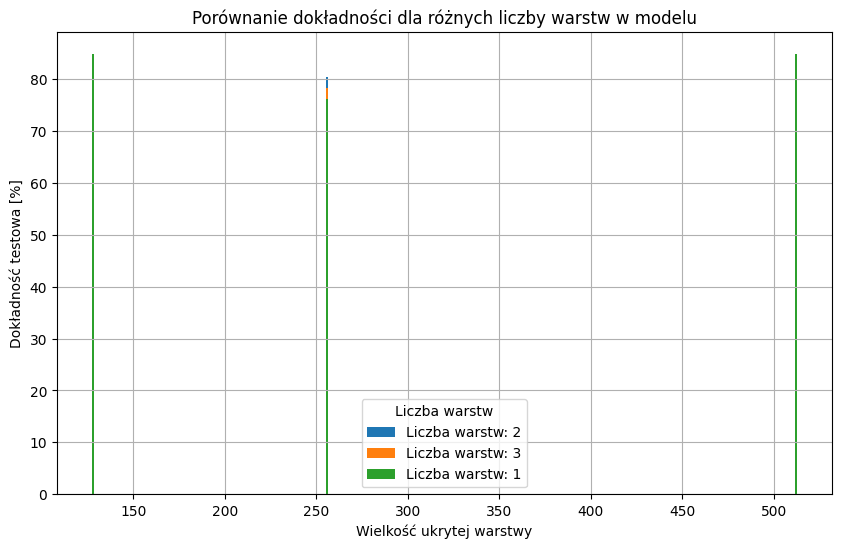

In [7]:
plt.figure(figsize=(10, 6))
for num_layers in df['num_layers'].unique():
    subset = df[df['num_layers'] == num_layers]
    plt.bar(subset['hidden_size'], subset['test_accuracy'], label=f'Liczba warstw: {num_layers}')

plt.xlabel('Wielkość ukrytej warstwy')
plt.ylabel('Dokładność testowa [%]')
plt.title('Porównanie dokładności dla różnych liczby warstw w modelu')
plt.legend(title='Liczba warstw')
plt.grid()
plt.show()


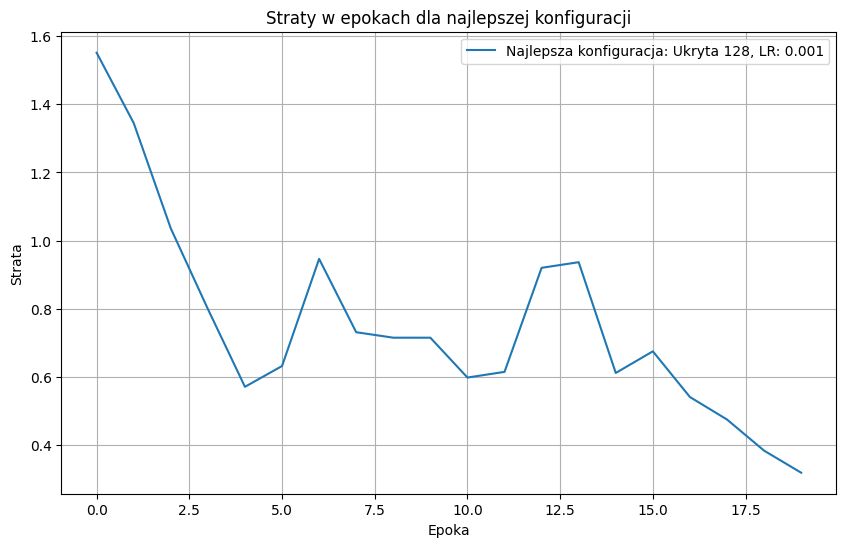

In [8]:
best_config = df.loc[df['test_accuracy'].idxmax()]
epoch_losses = eval(best_config['epoch_losses'])

plt.figure(figsize=(10, 6))
plt.plot(range(len(epoch_losses)), epoch_losses, label=f'Najlepsza konfiguracja: Ukryta {best_config["hidden_size"]}, LR: {best_config["learning_rate"]}')

plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Straty w epokach dla najlepszej konfiguracji')
plt.legend()
plt.grid()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Wczytanie danych z pliku CSV
file_path = r'/experiments/hyperparameter_tuning_progress.csv'
df = pd.read_csv(file_path)

# Filtrowanie danych dla wybranego modelu
selected_model = df[(df['hidden_size'] == 512) & (df['num_layers'] == 1)]


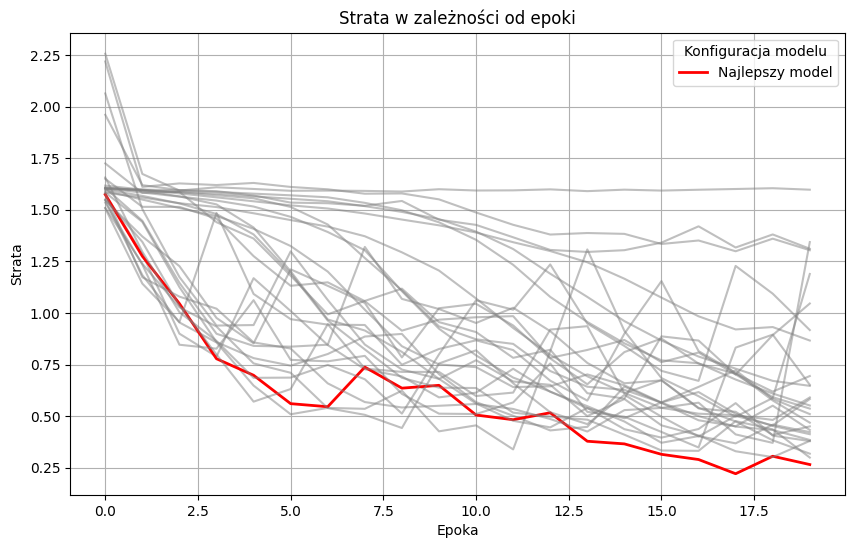

In [6]:
import matplotlib.pyplot as plt

# Rysowanie wykresu strat dla różnych konfiguracji z wyróżnieniem najlepszego modelu
plt.figure(figsize=(10, 6))

# Iteracja przez wiersze w DataFrame
for index, row in df.iterrows():
    epoch_losses = eval(row['epoch_losses'])

    # Sprawdzenie, czy to najlepsza konfiguracja
    if row['hidden_size'] == 512 and row['num_layers'] == 2 and row['learning_rate'] == 0.001:
        plt.plot(range(len(epoch_losses)), epoch_losses, label='Najlepszy model', color='red', linewidth=2)
    else:
        plt.plot(range(len(epoch_losses)), epoch_losses, color='gray', alpha=0.5)

# Dodanie etykiet i tytułu
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Strata w zależności od epoki')

# Dodanie legendy
plt.legend(title='Konfiguracja modelu', loc='upper right')

# Dodanie siatki
plt.grid()

# Wyświetlenie wykresu
plt.show()


In [1]:
import matplotlib.pyplot as plt

# Assuming `selected_model` contains the data for the best model
# Replace `selected_model` with the actual DataFrame containing the best model's data
selected_losses = eval(selected_model.iloc[0]['epoch_losses'])

# Wykres strat
plt.figure(figsize=(10, 6))
plt.plot(range(len(selected_losses)), selected_losses, label='Straty w epokach', color='blue', linewidth=2)
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Krzywa strat w epokach dla wybranego modelu')
plt.legend(title='Model: hidden_size=512, learning_rate=0.001, num_layers=2', loc='upper right')
plt.grid()
plt.show()


NameError: name 'selected_model' is not defined

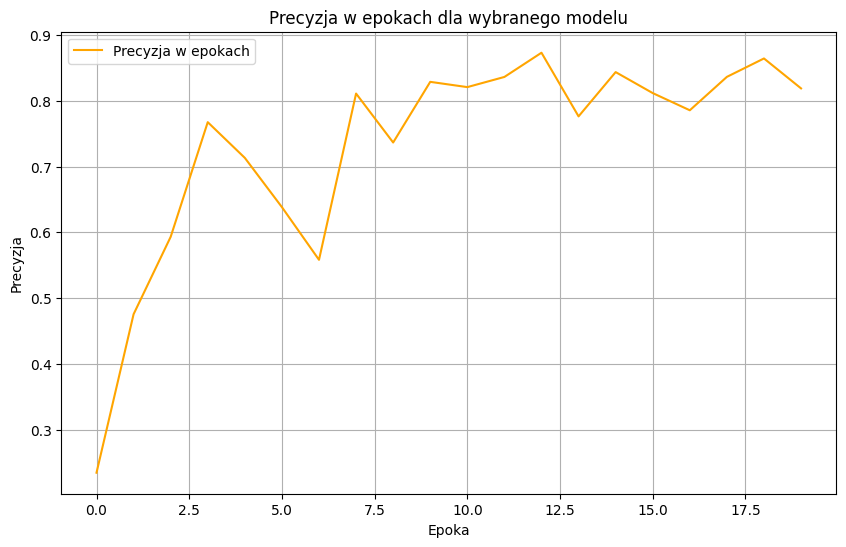

In [11]:
# Pobranie precyzji dla wybranego modelu
selected_precisions = eval(selected_model.iloc[0]['epoch_precisions'])

# Wykres precyzji
plt.figure(figsize=(10, 6))
plt.plot(range(len(selected_precisions)), selected_precisions, label='Precyzja w epokach', color='orange')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.title('Precyzja w epokach dla wybranego modelu')
plt.legend()
plt.grid()
plt.show()


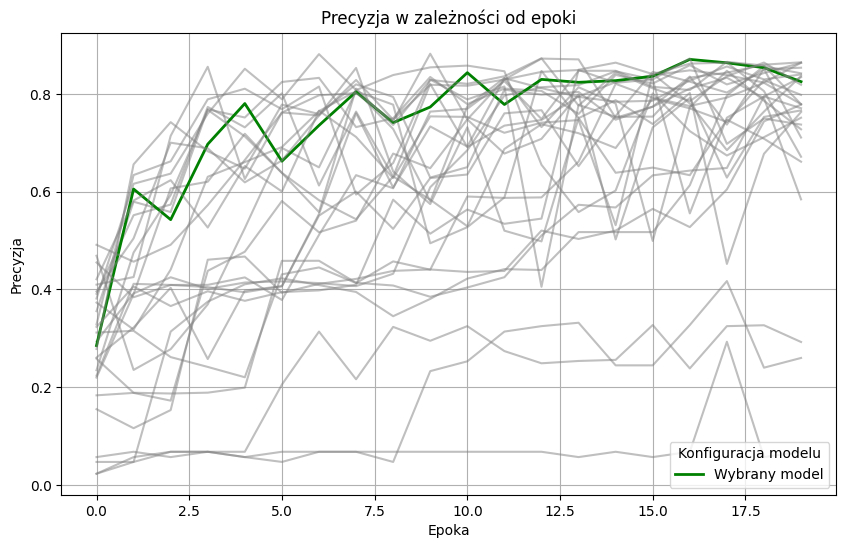

In [7]:
# Rysowanie wykresu precyzji dla różnych konfiguracji z wyróżnieniem wybranego modelu
plt.figure(figsize=(10, 6))

# Iteracja przez wiersze w DataFrame
for index, row in df.iterrows():
    epoch_precisions = eval(row['epoch_precisions'])
    
    # Sprawdzenie, czy to wybrana konfiguracja
    if row['hidden_size'] == 512 and row['num_layers'] == 2 and row['learning_rate'] == 0.001:
        plt.plot(range(len(epoch_precisions)), epoch_precisions, label='Wybrany model', color='green', linewidth=2)
    else:
        plt.plot(range(len(epoch_precisions)), epoch_precisions, color='gray', alpha=0.5)

# Dodanie etykiet i tytułu
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.title('Precyzja w zależności od epoki')

# Dodanie legendy
plt.legend(title='Konfiguracja modelu', loc='lower right')

# Dodanie siatki
plt.grid()

# Wyświetlenie wykresu
plt.show()


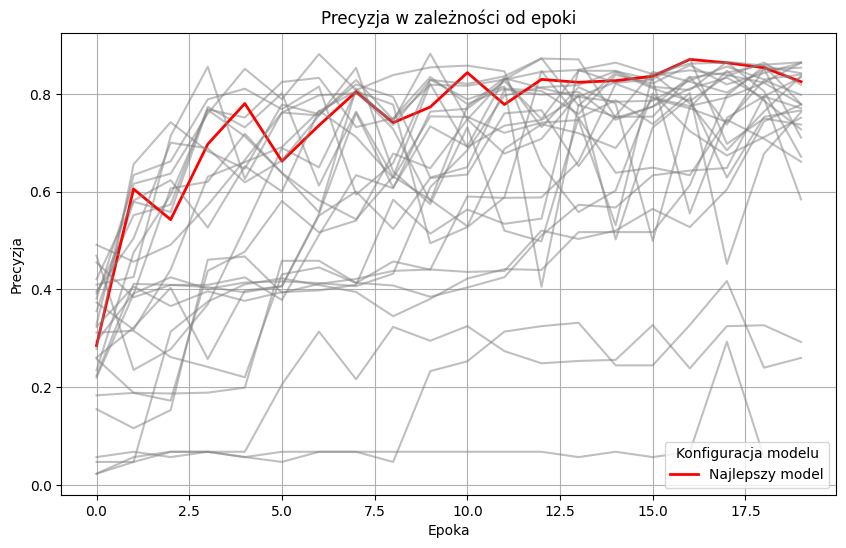

In [14]:
# Rysowanie wykresu precyzji dla różnych konfiguracji z wyróżnieniem najlepszej konfiguracji
plt.figure(figsize=(10, 6))

# Iteracja przez wiersze w DataFrame
for index, row in df.iterrows():
    epoch_precisions = eval(row['epoch_precisions'])
    
    # Sprawdzenie, czy to najlepsza konfiguracja
    if row['hidden_size'] == 512 and row['learning_rate'] == 0.001 and row['num_layers'] == 2:
        plt.plot(range(len(epoch_precisions)), epoch_precisions, label='Najlepszy model', color='red', linewidth=2)
    else:
        plt.plot(range(len(epoch_precisions)), epoch_precisions, color='gray', alpha=0.5)

# Dodanie etykiet i tytułu
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.title('Precyzja w zależności od epoki')

# Dodanie legendy
plt.legend(title='Konfiguracja modelu', loc='lower right')

# Dodanie siatki
plt.grid()

# Wyświetlenie wykresu
plt.show()


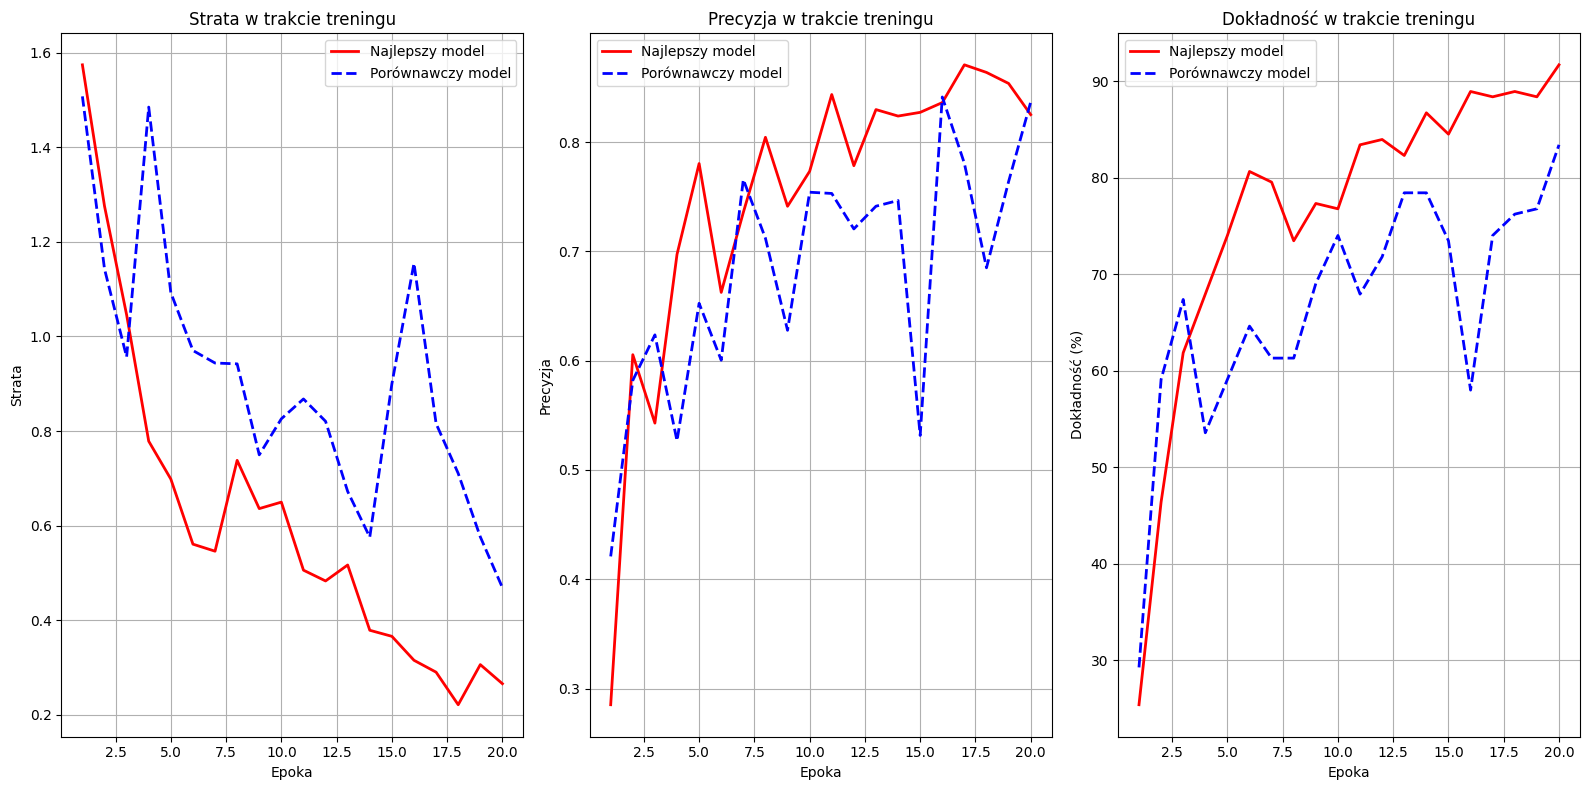

Statystyki najlepszego modelu:
{'Final Precision': 0.8250836120401338, 'Final Loss': 0.26584215958913165, 'Final Accuracy': 91.71270718232044}

Statystyki modelu porównawczego:
{'Final Precision': 0.8366545893719808, 'Final Loss': 0.4688487450281779, 'Final Accuracy': 83.42541436464089}


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Wczytaj dane
file_path = r'/experiments/hyperparameter_tuning_progress.csv'
df = pd.read_csv(file_path)

# Wybór dwóch modeli
#     if row['hidden_size'] == 512 and row['num_layers'] == 1 and row['learning_rate'] == 0.001:

best_model = df[(df['hidden_size'] == 512) & (df['learning_rate'] == 0.001) & (df['num_layers'] == 2)].iloc[0]
comparison_model = df[(df['hidden_size'] == 512) & (df['learning_rate'] == 0.001) & (df['num_layers'] == 1)].iloc[0]

# Konwersja danych
best_precisions = eval(best_model['epoch_precisions'])
best_losses = eval(best_model['epoch_losses'])
best_accuracies = eval(best_model['epoch_accuracies'])

comp_precisions = eval(comparison_model['epoch_precisions'])
comp_losses = eval(comparison_model['epoch_losses'])
comp_accuracies = eval(comparison_model['epoch_accuracies'])

# Wykresy
epochs = range(1, len(best_precisions) + 1)

plt.figure(figsize=(16, 8))

# Wykres strat
plt.subplot(1, 3, 1)
plt.plot(epochs, best_losses, label='Najlepszy model', color='red', linewidth=2)
plt.plot(epochs, comp_losses, label='Porównawczy model', color='blue', linewidth=2, linestyle='--')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Strata w trakcie treningu')
plt.legend()
plt.grid()

# Wykres precyzji
plt.subplot(1, 3, 2)
plt.plot(epochs, best_precisions, label='Najlepszy model', color='red', linewidth=2)
plt.plot(epochs, comp_precisions, label='Porównawczy model', color='blue', linewidth=2, linestyle='--')
plt.xlabel('Epoka')
plt.ylabel('Precyzja')
plt.title('Precyzja w trakcie treningu')
plt.legend()
plt.grid()

# Wykres dokładności
plt.subplot(1, 3, 3)
plt.plot(epochs, best_accuracies, label='Najlepszy model', color='red', linewidth=2)
plt.plot(epochs, comp_accuracies, label='Porównawczy model', color='blue', linewidth=2, linestyle='--')
plt.xlabel('Epoka')
plt.ylabel('Dokładność (%)')
plt.title('Dokładność w trakcie treningu')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Statystyki porównawcze
best_stats = {
    'Final Precision': best_precisions[-1],
    'Final Loss': best_losses[-1],
    'Final Accuracy': best_accuracies[-1]
}

comp_stats = {
    'Final Precision': comp_precisions[-1],
    'Final Loss': comp_losses[-1],
    'Final Accuracy': comp_accuracies[-1]
}

print("Statystyki najlepszego modelu:")
print(best_stats)

print("\nStatystyki modelu porównawczego:")
print(comp_stats)
